# Using pydap and pandas to read EBAS data

See more at http://ebas.nilu.no/
    
The EBAS database collects observational data on atmospheric chemical composition and physical properties from a variety of national and international research projects and monitoring programs, such as ACTRIS, AMAP, EMEP, GAW and HELCOM, as well as for the Norwegian monitoring programs funded by the Norwegian Environment Agency, the Ministry of Climate and Environment and NILU – Norwegian Institute for Air Research.

## Import Python packages

In [140]:
from pydap.client import open_dods, open_url
from netCDF4 import num2date
import pandas as pd
import cftime
import matplotlib.pyplot as plt

## Get data directly from EBAS database


- syntax: `ST_STATION_CODE.FT_TYPE.RE_REGIME_CODE.MA_MATRIX_NAME.CO_COMP_NAME.DS_RESCODE.FI_REF.ME_REF.DL_DATA_LEVEL.dods`
- or: `#station.instrument_type.IMG.matrix.component.resolution.instrument_reference.datalevel.dods`
- if no level, then `..dods`
- if doesn't work, download one file to check what are the `FI_REF` and `ME_REF`.
- other example: `http://dev-ebas-pydap.nilu.no/NO0042G.Hg_mon.IMG.air.mercury.1h.NO01L_tekran_42_dup.NO01L_afs..dods`

In [31]:
# get directly from EBAS
ds = open_dods(
'http://dev-ebas-pydap.nilu.no/' 
'NO0042G.dmps.IMG.aerosol.particle_number_size_distribution'
'.1h.NO01L_NILU_DMPSmodel2_ZEP.NO01L_dmps_DMPS_ZEP01.2.dods')

## Format data into pandas dataframe

In [122]:
#get the actual data
dmps_data = ds['particle_number_size_distribution_amean']

# get normalised size distribution in dNdlogDp
dNdlogDp = dmps_data.particle_number_size_distribution_amean.data

# get time in datatime format using function from netCDF4 package
tim_dmps = num2date(dmps_data.time.data,units='days since 1900-01-01 00:00:00',
calendar ='gregorian')

# get diameter vector
dp_NILU = dmps_data.D.data

# make DataFrame to simplify the handling of data
df_NILU = pd.DataFrame(dNdlogDp.byteswap().newbyteorder(), index=dp_NILU, columns=tim_dmps)

In [123]:
df_NILU.head()

2016-05-06 05:30:00  2016-05-06 06:30:00  2016-05-06 07:30:00  \
10.0                20.16                27.86                33.89   
12.0                41.16                37.93                46.07   
14.0                59.79                48.38                57.63   
17.0                52.01                45.14                56.40   
21.0                21.98                28.03                37.41   

      2016-05-06 08:30:00  2016-05-06 09:30:00  2016-05-06 10:30:00  \
10.0                38.96                32.82                44.25   
12.0                53.32                50.76                66.31   
14.0                64.44                68.81                92.40   
17.0                62.01                73.59               102.47   
21.0                44.52                54.98                73.01   

      2016-05-06 11:30:00  2016-05-06 12:30:00  2016-05-06 13:30:00  \
10.0               295.19               697.74               840.26   
12.0               169.43               543.82              1132.41   
14.0               100.44               330.05               889.54   
17.0                79.43               117.88               266.77   
21.0                87.58               115.21               152.36   

      2016-05-06 14:30:00  ...  2017-12-31 14:30:00  2017-12-31 15:30:00  \
10.0               946.78  ...                 8.52                 8.29   
12.0              1570.59  ...                 8.50                 9.41   
14.0              1576.16  ...                10.86                11.29   
17.0               772.37  ...                15.88                13.76   
21.0               243.23  ...                23.46                17.98   

      2017-12-31 16:30:00  2017-12-31 17:30:00  2017-12-31 18:30:00  \
10.0                13.86                 8.18                 9.96   
12.0                 7.67                 7.36                 6.70   
14.0                 5.13                 8.20                 5.69   
17.0                 8.77                 9.54                 8.48   
21.0                23.14                11.82                15.61   

      2017-12-31 19:30:00  2017-12-31 20:30:00  2017-12-31 21:30:00  \
10.0                 8.41                 6.92                 9.81   
12.0                 7.47                 7.53                 7.19   
14.0                 6.98                 8.08                 5.97   
17.0                 7.13                 7.99                 6.12   
21.0                 9.80                 8.35                 9.21   

      2017-12-31 22:30:00  2017-12-31 23:30:00  
10.0                10.94                 6.79  
12.0                 6.92                 7.05  
14.0                 4.80                10.96  
17.0                 5.17                12.47  
21.0                 8.28                 7.09  

[5 rows x 14515 columns]

## Select time and Plot

In [72]:
df_NILU.columns

Index([2016-05-06 05:30:00, 2016-05-06 06:30:00, 2016-05-06 07:30:00,
       2016-05-06 08:30:00, 2016-05-06 09:30:00, 2016-05-06 10:30:00,
       2016-05-06 11:30:00, 2016-05-06 12:30:00, 2016-05-06 13:30:00,
       2016-05-06 14:30:00,
       ...
       2017-12-31 14:30:00, 2017-12-31 15:30:00, 2017-12-31 16:30:00,
       2017-12-31 17:30:00, 2017-12-31 18:30:00, 2017-12-31 19:30:00,
       2017-12-31 20:30:00, 2017-12-31 21:30:00, 2017-12-31 22:30:00,
       2017-12-31 23:30:00],
      dtype='object', length=14515)

In [119]:
type(df_NILU.columns[0])

cftime._cftime.DatetimeGregorian

In [ ]:
tsel = cftime.DatetimeGregorian(2016, 5, 6, 5, 30)

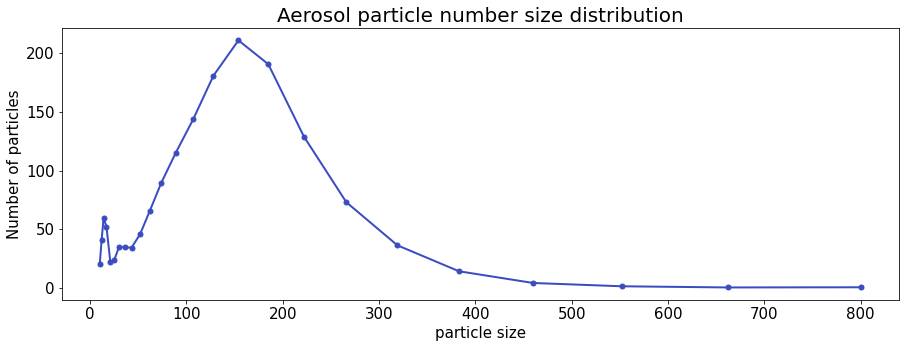

In [154]:
fig = plt.figure(1, figsize=[15,5])
ax = df_NILU[tsel].plot(lw=2, colormap='coolwarm', marker='.', markersize=10, title='Aerosol particle number size distribution', fontsize=15)
ax.set_xlabel("particle size", fontsize=15)
ax.set_ylabel("Number of particles", fontsize=15)
ax.title.set_size(20)

## Save into a local csv file

In [173]:
filename = 'size_dist' + tsel.strftime('%d%B%Y_%H%M') + '.csv'
print(filename)

size_dist06May2016_0530.csv


In [169]:
df_NILU[tsel].to_csv(filename, sep='\t', index=True, header=True)

## Save into Galaxy history
- You can also use [bioblend](https://bioblend.readthedocs.io/en/v0.5.3/index.html) python package to directly interact with your galaxy history

In [174]:
!put -p size_dist06May2016_0530.csv -t tabular

## Save to NIRD via s3fs
- Make sure you have your credential in `$HOME/.aws/credentials`

In [178]:
import s3fs

### Set the path on NIRD (and add "s3:/" in front of it)

In [184]:
s3_path = "s3://work/" + filename
print(s3_path)

s3://work/size_dist06May2016_0530.csv


In [182]:
fsg = s3fs.S3FileSystem(anon=False,
      client_kwargs={
         'endpoint_url': 'https://forces2021.uiogeo-apps.sigma2.no/'
      })

In [189]:
bytes_to_write = df_NILU[tsel].to_csv(None, sep='\t', index=True, header=True).encode()

with fsg.open(s3_path, 'wb') as f:
    f.write(bytes_to_write)

## Check your file

In [190]:
dfo = pd.read_csv(fsg.open(s3_path), sep='\t', index_col=0)

In [193]:
dfo.head()

2016-05-06 05:30:00
10.0                20.16
12.0                41.16
14.0                59.79
17.0                52.01
21.0                21.98

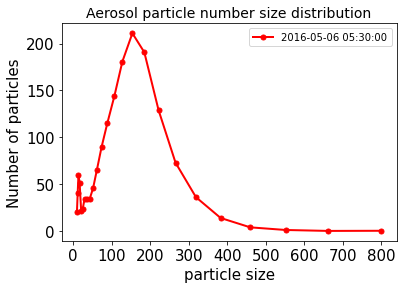

In [199]:
ax = dfo.plot(lw=2, color='red', marker='.', markersize=10, title='Aerosol particle number size distribution', fontsize=15)
ax.set_xlabel("particle size", fontsize=15)
ax.set_ylabel("Number of particles", fontsize=15)
ax.title.set_size(14)